In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!source ~/.azure.sh

In [3]:
from azureml.core.authentication import ServicePrincipalAuthentication
from azureml.core import Workspace, Run as AzureMLRun

In [4]:
sp_auth = ServicePrincipalAuthentication(
    tenant_id=os.environ["AZURE_TENANT_ID"],
    service_principal_id=os.environ["AZURE_CLIENT_ID"],
    service_principal_password=os.environ["AZURE_CLIENT_SECRET"],
)
ws = Workspace(
    subscription_id=os.environ["AZURE_SUBSCRIPTION_ID"],
    resource_group="PSL-PMP-ML",
    workspace_name="psl-ml-workspace",
    auth=sp_auth,
)

In [5]:
run = AzureMLRun(ws.experiments["Nested-EAGLE-v0"], run_id="aee76286-068d-4dff-a3e8-d05fd44b9006")

In [9]:
tloss = np.array(list(run.get_metrics("train_mse_loss_epoch").values())).squeeze()
vloss = np.array(list(run.get_metrics("val_mse_loss_epoch").values())).squeeze()

In [10]:
plt.style.use("~/nice.mplstyle")

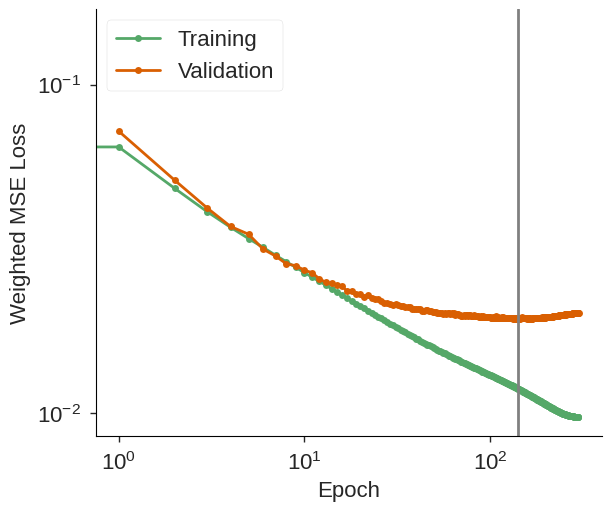

In [22]:
fig, ax = plt.subplots(figsize=(6,5), constrained_layout=True)

for x, y, label in zip(
    [np.arange(len(tloss)), np.arange(len(vloss))+1],
    [tloss, vloss],
    ["Training", "Validation"],
):
    ax.plot(
        x, y,
        marker="o",
        markersize=5,
        label=label,
    )
ax.set(
    yscale="log",
    xscale="log",
    xlabel="Epoch",
    ylabel="Weighted MSE Loss",
)
ax.axvline(x=142, color="gray")
ax.legend();
#fig.savefig(f"figures/mmgt_loss.jpeg", bbox_inches="tight", dpi=300)

In [20]:
np.argmin(vloss)

142

In [27]:
vloss[140:144]

array([0.01936564, 0.01942074, 0.01931109, 0.01940062])

In [28]:
vloss[-1]

0.020118797197937965

In [26]:
vloss[142]

0.0193110890686512

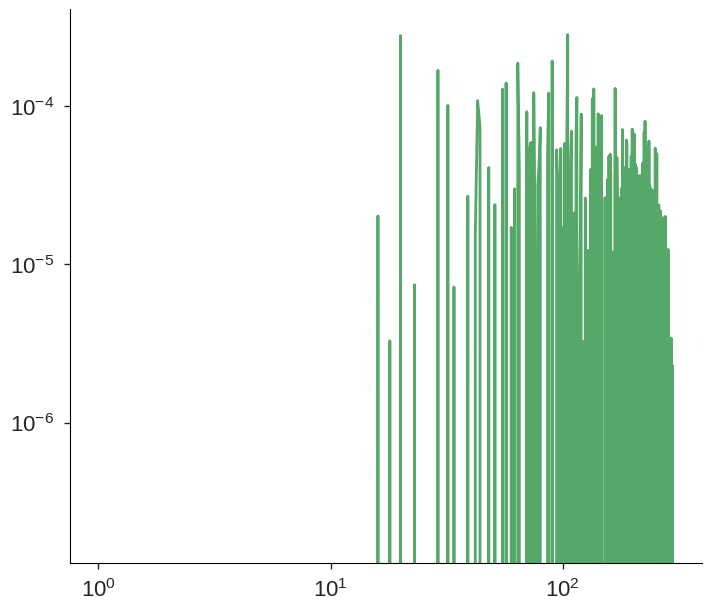

In [19]:
plt.loglog(np.diff(vloss))